
1. [랜덤 포레스트](#--랜덤포레스트)
1. [엑스트라트리](#--엑스트라트리)
1. [그레이디언트 부스팅](#--그레이디언트-부스팅)

# 트리의 앙상블

- https://youtu.be/Moz8i-tKurk
- https://speedanddirection.tistory.com/80
- https://sirokun.tistory.com/25

## - 정형 데이터와 비정형 데이터

 어떤 구조로 되어있는 이런 데이터는 CSV나 데이터베이스, 혹은 엑셀에 저장하기 쉽다. 이와 반대되는 데이터를 비정형 데이터라고 부른다. 
 - 텍스트 데이터, 카메라로 찍은 사진, 핸드폰으로 듣는 디지털 음악 등이 있다.
 - 정형 데이터를 다루는데 가장 뛰어난 성과를 내는 알고리즘이 앙상블 학습이다. 
 - 이 알고리즘은 대부분 결정 트리를 기반으로 만들어져 있다.


## - 랜덤포레스트

랜덤 포레스트는 ***결정 트리를 랜덤하게 만들어 결정 트리의 숲을 만든다*** . 그리고 각 결정 트리의 예측을 사용해 최종 예측을 만든다. 



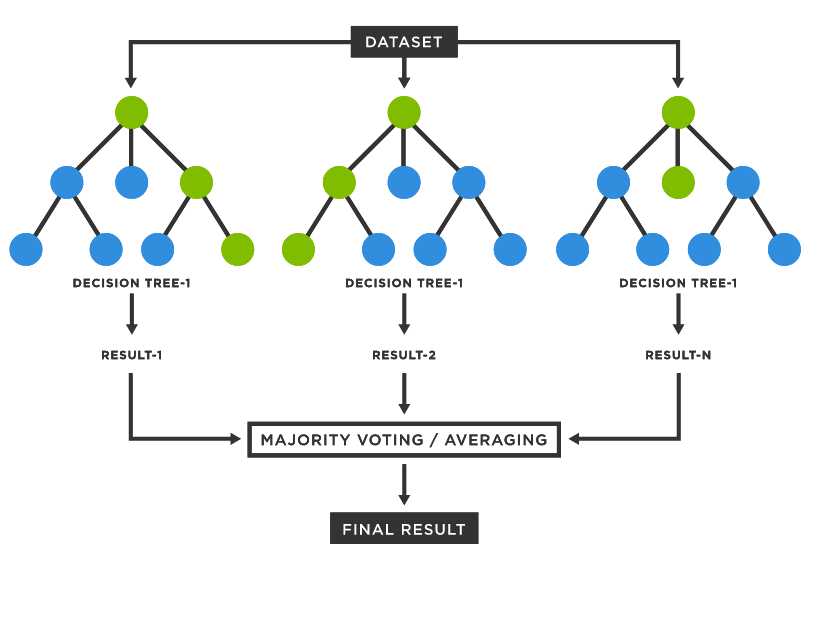
 - https://www.tibco.com/reference-center/what-is-a-random-forest

랜덤 포레스트는 훈련을 통해 구성해놓은 다수의 나무들로부터 분류 결과를 취합해서 결론을 얻는, 일종의 인기 투표(?) 같은 거다.

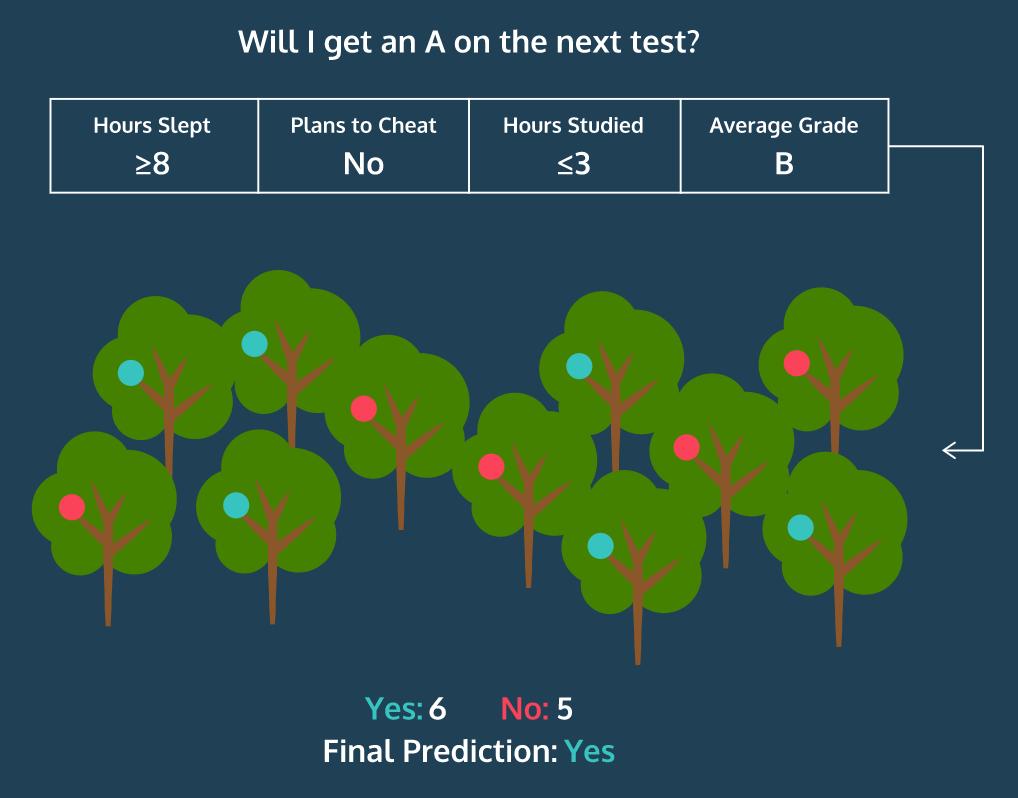
 - https://hleecaster.com/ml-random-forest-concept/

랜덤 포레스트는  결정 트리를 랜덤하게 만들어 각 결정 트리를 훈련하기 위한 데이터를 랜덤하게 만드는데,  입력한 훈련 데이터에서 랜덤하게 샘플을 추출하여 훈련 데이터를 만든다. 이때 한 샘플이 중복되어 추출될 수도 있다. 이렇게 만들어진 샘플을 **부트스트랩 샘플** 이라고 부른다.

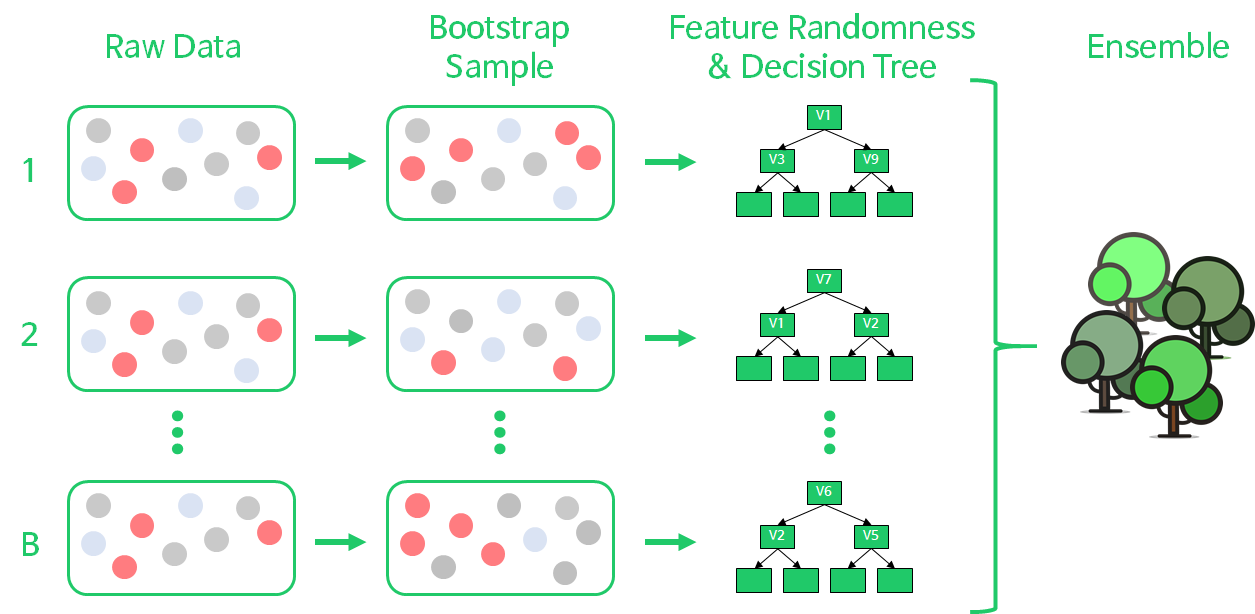

 - https://velog.io/@vvakki_/%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%EC%97%90%EC%84%9C%EC%9D%98-%EB%B3%80%EC%88%98-%EC%A4%91%EC%9A%94%EB%8F%84Variable-Importance-3%EA%B0%80%EC%A7%80

## 랜덤포레스트 와인 분류

이제 사이킷런의 RandomForestClassifier 클래스를 화이트 와인을 분류하는 문제에 적용해 보자.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/wine.csv')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

X_train, X_test, y_train, y_test = \
    train_test_split(data, target, test_size=0.2, random_state=42)

RandomForestCalssifier는 기본적으로 100개의 결정 트리를 사용한다.
 - return_train_score : True로 지정하면 검증 점수 뿐만 아니라 훈련 세트에 대한 점수도 같이 반환

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


훈련 세트에 과대적합된 것 같다

#### 특성 중요도
 
특성 중요도는 데이터 컬럼에 해당하는 특성에 대해서, 각 결정 트리의 특성 중요도를 취합한 것이다. 
 - `.feature_importances_` 속성으로 중특성 중요도를 산출한다. 
 

In [3]:
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


앞서 결정 트리에서 만든 특성 중요도와 비교해보면 각 특성 알코올도수, 당도, pH에서, 두 번째 특성인 당도의 중요도가 감소하고 알코올 도수와 pH특성의 중요도가 조금 상승했다. 

#### OOB 샘플

랜덤 포레스트는 훈련 세트에서 중복을 허용하여 부트스트랩 샘플을 만들어 결정 트리를 훈련한다고 했다. 이때 부트스트랩 샘플에 포함되지 않고 남는 샘플이 있다. 이런 샘플을 OOB 샘플이라고 한다.

In [4]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(X_train, y_train)
print(rf.oob_score_)

0.8934000384837406


교차 검증에서 얻은 점수와 매우 비슷한 결과를 얻었다. ***OOB 점수를 사용하면 교차 검증을 대신할 수 있어서 결과적으로 훈련 세트에 더 많은 샘플을 사용할 수 있다*** .

## - 엑스트라트리

Extra Tree 는 랜덤 포레스트와 매우 비슷하게 동작한다. 기본적으로 100개의 결정 트리를 훈련한다. 랜덤 포레스트와 동일하게 결정 트리가 제공하는 대부분의 매개변수를 지원한다. 또한 전체 특성 중에 일부 특성을 랜덤하게 선택하여 노드를 분할하는 데 사용한다. 랜덤 포레스트와 엑스트라 트리의 차이점은 ***부트스트랩 샘플을 사용하지 않는다*** 는 점이다. 

즉 각 결정 트리를 만들 때 전체 훈련 세트를 사용한다. 대신 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할한다. 엑스트라 트리가 사용하는 결정트리는 splitter='random'인 결정트리이다. ***하나의 결정 트리에서 특성을 무작위로 분할한다면 성능은 낮아지겠지만 많은 트리를 앙상블 하기 때문에 과대적합을 막고 검증 세트의 점수를 높이는 효과가 있다*** . 

엑스트라 트리가 무작위성이 좀 더 크기 때문에 랜덤 포레스트보다 더 많은 결정 트리를 훈련해야 한다. 하지만 랜덤으로 노드를 분할하기 때문에 빠른 계산 속도가 엑스트라 트리의 장점이다.
 
사이킷런에서 제공하는 엑스트라 트리는 ExtraTreesClassifier 이다.

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


랜덤 포레스트와 비슷한 결과가 나왔다. 와인 예제는 특성이 많지 않아 두 모델의 차이가 크지 않다.

엑스트라 트리도 랜덤 포레스트와 마찬가지로 특성 중요도를 제공한다. 알코올 도수, 당도, pH 순서 인데 결과를 보면 엑스트라 트리도 결정 트리보다 당도에 대한 의존성이 작다.



In [6]:
et.fit(X_train, y_train)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


엑스트라 트리의 회귀 버전은 ExtraTreesRegressor 클래스이다.

## - 그레이디언트 부스팅

그레이디언트 부스팅은 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블 하는 방법이다.  - ***깊이가 얕은 결정 트리를 사용하기 때문에 과대적합에 강하고 일반적으로 높은 일반화 성능을 기대할 수 있다*** . 

> 참고: https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-15-Gradient-Boost


In [5]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


과대적합이 거의 되지 않았다. 그레이디언트 부스팅은 결정 트리의 개수를 늘려도 과대적합에 매우 강하다. 
 - 학습률, 트리의 개수를 늘리면 조금 더 성능이 향상.

In [7]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [8]:
gb.fit(X_train, y_train)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


결과를 보면 랜덤 포레스트보다 당도에 더 집중한다.

#### subsample

트리 훈련에 사용할 훈련 세트의 비율을 정하는 subsample이다. 기본값은 1.0으로 전체 훈련 세트를 사용, 1보다 작으면 훈련 세트의 일부를 사용한다.

In [9]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42, subsample=0.8)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

gb.fit(X_train, y_train)
print(gb.feature_importances_)

0.9463633551918373 0.877815577108166
[0.17849048 0.638021   0.18348852]


## - 히스토그램 기반 부스팅

히스토그램 기반 그레이디언트 부스팅은 정형 데이터를 다루는 머신러닝 알고리즘 중에 가장 인기가 높은 알고리즘이다. 히스토그램 기반 그레이디언트 부스팅은 먼저 입력 특성을 256개의 구간으로 나눈다. 


사이킷런의 히스토그램 기반 그레이디언트 부스팅 클래스는 HistGradientBoostingClassifier는 기본 매개변수에서 안정적인 성능을 얻을 수 있다. 
 - 트리의 개수 대신 부스팅 반복 횟수를 지정하는 max_iter를 사용한다.

In [10]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


과대 적합을 잘 억제하면서 그레이디언트 부스팅보다 조금 더 높은 성능을 제공한다. 

히스토그램 기반 그레이디언트 부스팅의 특성 중요도를 계산하기 위해 permutation_importace() 함수를 사용하자.

In [11]:
from sklearn.inspection import permutation_importance

hgb.fit(X_train, y_train)
result = permutation_importance(hgb, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


permutation_importance() 함수가 반환하는 객체는 반복하여 얻은 특성 중요도, 평균, 표준편차를 담고있다.

이번엔 테스트 세트에서 특성 중요도를 계산해 보자.

In [12]:
result = permutation_importance(hgb, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


테스트 세트의 결과를 보면 그레이디언트 부스팅과 비슷하게 조금 더 당도에 집중하고 있다는 것을 알 수 있다. 

In [14]:
hgb.score(X_test, y_test)

0.8723076923076923

## - XGBoost

- 여러개의 Decision Tree를 조합해서 사용하는 Ensemble 알고리즘
- XGBoost에서 tree_method를 hist로 지정하면 히스토그램 기반 그레이디언트 부스팅 알고리즘을 쓸 수 있다.

In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8824322471423747 0.8726214185237284


## - LightGBM

-  LightGBM의 경우에는 최대 손실값을 가지는 노드를 중심으로 계속해서 분할하는 '리프 중심 트리 분할(leaf-wise)' 방식을 사용한다.

- 따라서 트리가 깊어지기위해 소요되는 시간과 메모리를 많이 절약할 수 있다.

- 다만 적은 데이터에 대한 과적합(overfitting)이 발생하기 쉽다

 

In [15]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9338079582727165 0.8789710890649293


참고
 - 혼자 공부하는 머신러닝+딥러닝
